<a href="https://colab.research.google.com/github/krupke-group/MOF_CNTFET_LOD/blob/main/MOF_CNTFET_LOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2023, krupke-group
All rights reserved.

This source code is licensed under the BSD-style license found in the
LICENSE file in the root directory of this source tree. 

In [1]:
# Define a dictionary with a and b values for each tau
ab_values = {
    10: (3.19, 2.45),
    30: (3.81, 1.82),
    100: (4.14, 0.9),
    200: (4.37, 0.7)
}

# Define the conversion factor from mg/l to ppm
c = 100 / 0.2

# Define the values of tau and y
tau_values = [10, 30, 100, 200]  # in seconds
y_values = [100, 10, 1, 26.1]  # as percentages

# Create a table of x values for all combinations of tau and y
table = []
for y in y_values:
    row = [f'{y}%']
    for tau in tau_values:
        a_tau, b_tau = ab_values[tau]
        x = (y/100)**(1/b_tau) * 10**(-a_tau/b_tau)
        x_ppm = x * c
        if (x_ppm < 0.1 and x_ppm >= 1e-4):
            x_str = f'{x_ppm * 1000:.4f} ppb'
        elif x_ppm < 1e-4:
            x_str = f'{x_ppm * 1e6:.4f} ppt'
        else:
            x_str = f'{x_ppm:.3f} ppm'
        row.append(x_str)
    table.append(row)

# Print the table
print('   '.join([''] + [f'{tau}s' for tau in tau_values]))
for row in table:
    print('   '.join(row))


   10s   30s   100s   200s
100%   24.942 ppm   4.032 ppm   12.5594 ppb   0.2858 ppb
10%   9.745 ppm   1.138 ppm   0.9724 ppb   10.6547 ppt
1%   3.807 ppm   0.321 ppm   75.2918 ppt   0.3972 ppt
26.1%   14.415 ppm   1.928 ppm   2.8235 ppb   41.9510 ppt


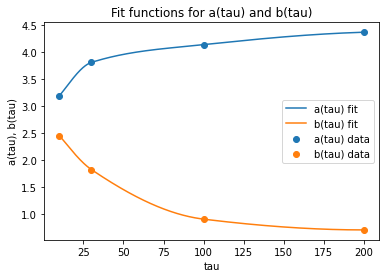

In [2]:
import numpy as np
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt

# Define the tau values and corresponding ab_values
tau = np.array([10, 30, 100, 200])
a_vals = np.array([3.19, 3.81, 4.14, 4.37])
b_vals = np.array([2.45, 1.82, 0.9, 0.7])

# Define the interpolation functions for a(tau) and b(tau)
a_interp = PchipInterpolator(tau, a_vals)
b_interp = PchipInterpolator(tau, b_vals)

# Define the tau values to evaluate the interpolation functions
tau_eval = np.linspace(10, 200, 1000)

# Evaluate the interpolation functions at the tau values
a_fit = a_interp(tau_eval)
b_fit = b_interp(tau_eval)

# Plot the fit functions for a(tau) and b(tau)
fig, ax = plt.subplots()
ax.plot(tau_eval, a_fit, label='a(tau) fit')
ax.plot(tau_eval, b_fit, label='b(tau) fit')
ax.scatter(tau, a_vals, label='a(tau) data')
ax.scatter(tau, b_vals, label='b(tau) data')
ax.legend()
ax.set_xlabel('tau')
ax.set_ylabel('a(tau), b(tau)')
ax.set_title('Fit functions for a(tau) and b(tau)')
plt.show()


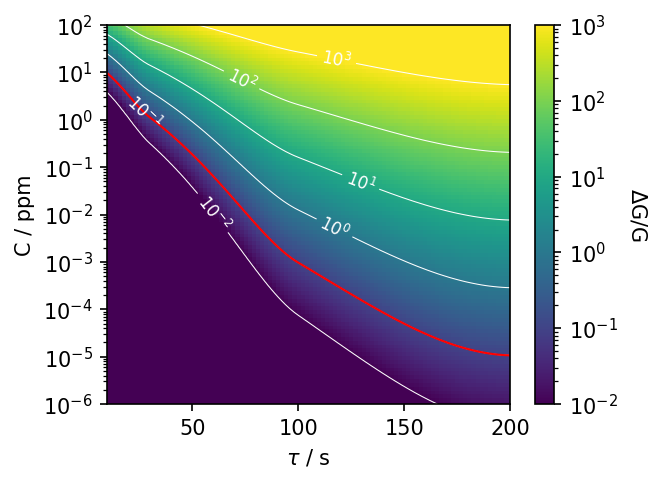

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
from matplotlib.colors import LogNorm

# Define the tau values and corresponding ab_values
tau = np.array([10, 30, 100, 200])
a_vals = np.array([3.19, 3.81, 4.14, 4.37])
b_vals = np.array([2.45, 1.82, 0.9, 0.7])

# Define the interpolation functions for a(tau) and b(tau)
a_interp = PchipInterpolator(tau, a_vals)
b_interp = PchipInterpolator(tau, b_vals)

# Define the tau and c values to evaluate y
tau_eval = np.linspace(10, 200, 100) # linear scaling for tau
c_eval = np.logspace(-6, 2, 100) # logarithmic scaling for c
tau_eval, c_eval = np.meshgrid(tau_eval, c_eval)

# Define the conversion factor from mg/l to ppm
conv = 100 / 0.2

# Calculate y for each tau and c combination
y = 10**(a_interp(tau_eval) + b_interp(tau_eval) * np.log10(c_eval/conv))

# Plot the heatmap
fig, ax = plt.subplots(figsize=(11/2.54,8.5/2.54),dpi=150)
heatmap = ax.pcolormesh(tau_eval, c_eval, y, cmap='viridis', norm=LogNorm(vmin=0.01, vmax=1e3))
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel(r'$\Delta$G/G', rotation=270, labelpad=15)
ax.set_xlabel(r'$\tau$ / s')
ax.set_ylabel('C / ppm')
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlim(10,200)
ax.set_ylim(1e-6,100)

# Add contour lines for every decade
levels = [10**(i) for i in range(-2,4)]
contour = ax.contour(tau_eval, c_eval, y, levels=levels, colors='white', linewidths=0.5)

# Add a contour line for 10^-1 in red
contour_01 = ax.contour(tau_eval, c_eval, y, levels=[0.1], colors='red', linewidths=1.0, linestyles='solid')

# Format contour labels as exponents of 10
fmt = {}
for level in contour.levels:
    fmt[level] = '$10^{%d}$' % np.log10(level)

ax.clabel(contour, contour.levels, inline=True, fontsize=8, fmt=fmt)

plt.show()


In [4]:
import matplotlib.pyplot as plt
def set_rcParams():
    """
    This function sets plotting parameters
    """
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.linewidth'] = 1
    plt.rcParams['hatch.linewidth'] = 0.5
    plt.rcParams['hatch.color'] = 'grey'

    plt.rcParams['xtick.direction'] = 'out'
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['xtick.major.size'] = 5
    plt.rcParams['xtick.major.pad'] = 5
    plt.rcParams['xtick.minor.size'] = 5
    plt.rcParams['xtick.minor.pad'] = 5

    plt.rcParams['ytick.direction'] = 'out'
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 5
    plt.rcParams['ytick.major.pad'] = 5
    plt.rcParams['ytick.minor.size'] = 5
    plt.rcParams['ytick.minor.pad'] = 5

    plt.rcParams['figure.figsize'] = [11/2.54, 8.5/2.54]
    plt.rcParams['figure.dpi'] = 75

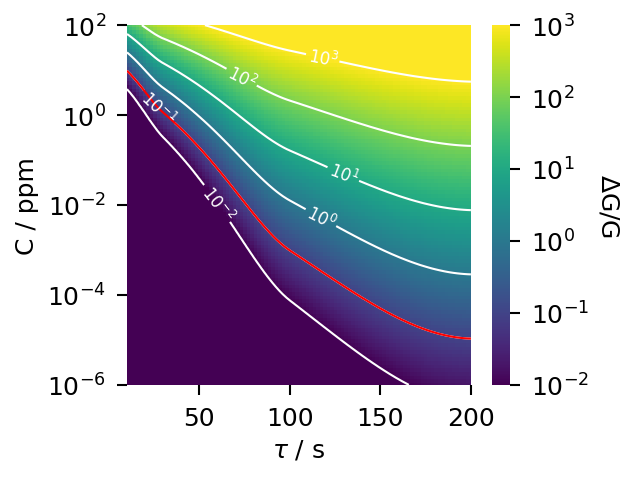

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import PchipInterpolator
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator, NullFormatter, FixedFormatter


# Define the tau values and corresponding ab_values
tau = np.array([10, 30, 100, 200])
a_vals = np.array([3.19, 3.81, 4.14, 4.37])
b_vals = np.array([2.45, 1.82, 0.9, 0.7])

# Define the interpolation functions for a(tau) and b(tau)
a_interp = PchipInterpolator(tau, a_vals)
b_interp = PchipInterpolator(tau, b_vals)

# Define the tau and c values to evaluate y
tau_eval = np.linspace(10, 200, 100) # linear scaling for tau
c_eval = np.logspace(-6, 2, 100) # logarithmic scaling for c
tau_eval, c_eval = np.meshgrid(tau_eval, c_eval)

# Define the conversion factor from mg/l to ppm
conv = 100 / 0.2

# Calculate y for each tau and c combination
y = 10**(a_interp(tau_eval) + b_interp(tau_eval) * np.log10(c_eval/conv))

# Plot the heatmap
set_rcParams()
fig, ax = plt.subplots(figsize=(11/2.54,8.5/2.54),dpi=150)

heatmap = ax.pcolormesh(tau_eval, c_eval, y, cmap='viridis', norm=LogNorm(vmin=0.01, vmax=1e3))
cbar = fig.colorbar(heatmap)
cbar.ax.set_ylabel(r'$\Delta$G/G', rotation=270, labelpad=15)
cbar.outline.set_edgecolor('none')
ax.set_xlabel(r'$\tau$ / s')
ax.set_ylabel('C / ppm')
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlim(10,200)
ax.set_ylim(1e-6,100)
ax.spines[:].set_edgecolor('none')

# Remove the minor ticks
cbar.ax.yaxis.set_minor_locator(LogLocator())
cbar.ax.yaxis.set_minor_formatter(NullFormatter())

# Add contour lines for every decade
levels = [10**(i) for i in range(-2,4)]
contour = ax.contour(tau_eval, c_eval, y, levels=levels, colors='white', linewidths=1.0)

# Add a contour line for 10^-1 in red
contour_01 = ax.contour(tau_eval, c_eval, y, levels=[0.1], colors='red', linewidths=1.0, linestyles='solid')

# Format contour labels as exponents of 10
fmt = {}
for level in contour.levels:
    fmt[level] = '$10^{%d}$' % np.log10(level)

ax.clabel(contour, contour.levels, inline=True, fontsize=8, fmt=fmt)

fig.tight_layout()
plt.savefig('Figure_x.png', dpi=600, facecolor='white')
plt.show()